In [1]:
%matplotlib inline

import sqlite3
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import sys

In [2]:
import matplotlib
print('matplotlib: {}'.format(matplotlib.__version__))

matplotlib: 3.0.2


In [3]:
RT_LIMIT_LOWER = 4340
RT_LIMIT_UPPER = 4580

In [4]:
BASE_NAME = "/home/ubuntu/HeLa_20KInt-rt-{}-{}".format(RT_LIMIT_LOWER,RT_LIMIT_UPPER)
CONVERTED_DATABASE_NAME = '{}/HeLa_20KInt.sqlite'.format(BASE_NAME)

In [5]:
CONVERTED_DATABASE_NAME

'/home/ubuntu/HeLa_20KInt-rt-4340-4580/HeLa_20KInt.sqlite'

In [6]:
feature_list_filename = "{}/HeLa_20KInt-feature-list.csv".format(BASE_NAME)
feature_list_df = pd.read_csv(feature_list_filename)

In [7]:
allpeptides_df = pd.read_csv('/home/ubuntu/maxquant_results/txt/allPeptides.txt', sep='\t')

In [8]:
len(allpeptides_df)

328862

In [9]:
allpeptides_df.head()

,Raw file,Charge,m/z,Mass,Resolution,Number of data points,Number of frames,Number of isotopic peaks,Isotope correlation,Mass fractional part,...,Min frame index,Max frame index,Ion mobility index,Ion mobility index length,Ion mobility index length (FWHM),Intensity,Intensities,Number of pasef MS/MS,Pasef MS/MS IDs,MS/MS scan number
0,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,326.37791,325.37063,24329.390330,3048,20,2,0.999609,0.370635,...,5137,5156,363,54,27,31429.0,NaN,0,NaN,NaN
1,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,312.32607,311.31879,24234.331350,19515,75,2,0.992528,0.318792,...,5351,5425,501,51,21,81118.0,NaN,0,NaN,NaN
2,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,316.28438,315.27711,24449.285122,706,7,2,0.999514,0.277105,...,5112,5118,549,75,27,36051.0,NaN,0,NaN,NaN
3,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,307.09608,306.08880,24469.582565,7633,22,2,0.998656,0.088801,...,4935,4956,651,111,30,295110.0,NaN,0,NaN,NaN
4,HeLa_20KInt_2KIT_Slot1-46_01_1179,1,316.16858,315.16130,24514.638897,108,3,2,0.999752,0.161303,...,5032,5034,645,21,18,7543.2,NaN,0,NaN,NaN


In [10]:
allpeptides_df.columns

Index(['Raw file', 'Charge', 'm/z', 'Mass', 'Resolution',
       'Number of data points', 'Number of frames', 'Number of isotopic peaks',
       'Isotope correlation', 'Mass fractional part', 'Mass deficit',
       'Retention time', 'Retention length', 'Retention length (FWHM)',
       'Min frame index', 'Max frame index', 'Ion mobility index',
       'Ion mobility index length', 'Ion mobility index length (FWHM)',
       'Intensity', 'Intensities', 'Number of pasef MS/MS', 'Pasef MS/MS IDs',
       'MS/MS scan number'],
      dtype='object')

In [11]:
allpeptides_df.rename(columns={'Number of isotopic peaks':'isotope_count', 'm/z':'mz', 'Number of data points':'number_data_points', 'Intensity':'intensity', 'Ion mobility index':'scan', 'Ion mobility index length':'scan_length', 'Ion mobility index length (FWHM)':'scan_length_fwhm', 'Retention time':'rt', 'Retention length':'rt_length', 'Retention length (FWHM)':'rt_length_fwhm', 'Charge':'charge_state'}, inplace=True)

In [16]:
allpeptides_df.columns

Index(['Raw file', 'charge_state', 'mz', 'Mass', 'Resolution',
       'number_data_points', 'Number of frames', 'isotope_count',
       'Isotope correlation', 'Mass fractional part', 'Mass deficit', 'rt',
       'rt_length', 'rt_length_fwhm', 'Min frame index', 'Max frame index',
       'scan', 'scan_length', 'scan_length_fwhm', 'intensity', 'Intensities',
       'Number of pasef MS/MS', 'Pasef MS/MS IDs', 'MS/MS scan number'],
      dtype='object')

In [12]:
feature_list_df.head()

,feature_id,charge_state,monoisotopic_mass,feature_centroid_scan,feature_centroid_rt,feature_centroid_mz,feature_start_rt,feature_end_rt,feature_scan_lower,feature_scan_upper,...,base_peak_scan_lower,base_peak_scan_upper,base_peak_centroid_rt,base_peak_std_dev_rt,base_peak_rt_lower,base_peak_rt_upper,base_peak_centroid_mz,base_peak_std_dev_mz,base_peak_mz_lower,base_peak_mz_upper
0,1,2,1789.903876,432.554732,4432.861258,896.398529,4427.824409,4443.177867,422,442,...,422,442,4433.020714,2.598279,4430.187565,4440.816682,895.958387,0.004415,895.917833,895.998069
1,2,2,1753.793257,414.272995,4459.104625,878.396096,4449.083986,4471.506226,405,425,...,405,425,4459.755071,4.440888,4449.083986,4471.506226,878.405911,0.006066,878.371983,878.442083
2,3,2,1658.901506,438.122446,4400.319978,830.627797,4390.028733,4412.471973,426,446,...,426,446,4400.557071,2.519410,4390.028733,4412.471973,830.458480,0.005567,830.406597,830.492932
3,4,2,1424.730227,486.765365,4533.062044,713.624696,4519.935285,4542.374700,472,492,...,472,492,4532.433233,3.352277,4529.382170,4542.374700,713.372265,0.002964,713.340924,713.404096
4,5,2,1424.729543,482.752245,4529.693034,713.687159,4519.935285,4540.014544,478,496,...,478,493,4529.118263,3.873986,4519.935285,4540.014544,713.372338,0.005519,713.340924,713.408308


In [13]:
feature_list_subset_df = feature_list_df[["feature_id","mono_peak_centroid_mz","mono_peak_centroid_rt","mono_peak_centroid_scan","monoisotopic_mass","feature_summed_intensity","charge_state"]].copy()

In [14]:
feature_list_subset_df.sort_values(by=['feature_summed_intensity'], ascending=False, inplace=True)

In [15]:
allpeptides_subset_df = allpeptides_df[["mz","intensity","charge_state","rt","scan"]].copy()
allpeptides_subset_df = allpeptides_subset_df[(allpeptides_subset_df.rt >= RT_LIMIT_LOWER) & (allpeptides_subset_df.rt <= RT_LIMIT_UPPER)]

In [15]:
allpeptides_subset_df.sort_values(by=['intensity'], ascending=False).head()

,mz,intensity,charge_state,rt,scan
273238,895.95670,26707000.0,2,4432.552,363
271311,877.90152,16367000.0,2,4457.345,411
258239,830.45670,10780000.0,2,4398.299,435
272371,890.44758,9524100.0,2,4512.851,348
257004,821.89394,8506200.0,2,4536.471,465


Enumerate the MQ features

In [16]:
allpeptides_subset_df = allpeptides_subset_df[allpeptides_subset_df.intensity.notnull()].copy()

allpeptides_subset_df.sort_values(by=['intensity'], ascending=False, inplace=True)
allpeptides_subset_df["mq_feature_id"] = np.arange(start=1, stop=len(allpeptides_subset_df)+1)

In [17]:
import pickle
allpeptides_subset_df.to_pickle("{}/allpeptides_subset_df.pkl".format(BASE_NAME))

In [18]:
MZ_TOLERANCE_PPM = 5
MZ_TOLERANCE_PERCENT = MZ_TOLERANCE_PPM * 10**-4 
RT_TOLERANCE_SECS = 5
DRIFT_TOLERANCE = 5

allpeptides_subset_df["mz_delta"] = allpeptides_subset_df.mz * MZ_TOLERANCE_PERCENT / 100
allpeptides_subset_df["mz_upper"] = allpeptides_subset_df.mz + allpeptides_subset_df.mz_delta
allpeptides_subset_df["mz_lower"] = allpeptides_subset_df.mz - allpeptides_subset_df.mz_delta

allpeptides_subset_df["rt_upper"] = allpeptides_subset_df.rt + RT_TOLERANCE_SECS
allpeptides_subset_df["rt_lower"] = allpeptides_subset_df.rt - RT_TOLERANCE_SECS

allpeptides_subset_df["drift_upper"] = allpeptides_subset_df.scan + DRIFT_TOLERANCE
allpeptides_subset_df["drift_lower"] = allpeptides_subset_df.scan - DRIFT_TOLERANCE

In [19]:
allpeptides_subset_df.head()

,mz,intensity,charge_state,rt,scan,mq_feature_id,mz_delta,mz_upper,mz_lower,rt_upper,rt_lower,drift_upper,drift_lower
273238,895.95670,26707000.0,2,4432.552,363,1,0.004480,895.961180,895.952220,4437.552,4427.552,368,358
271311,877.90152,16367000.0,2,4457.345,411,2,0.004390,877.905910,877.897130,4462.345,4452.345,416,406
258239,830.45670,10780000.0,2,4398.299,435,3,0.004152,830.460852,830.452548,4403.299,4393.299,440,430
272371,890.44758,9524100.0,2,4512.851,348,4,0.004452,890.452032,890.443128,4517.851,4507.851,353,343
257004,821.89394,8506200.0,2,4536.471,465,5,0.004109,821.898049,821.889831,4541.471,4531.471,470,460


In [20]:
match_list = []

for mq_idx in range(len(allpeptides_subset_df)):
    mq_feature_df = allpeptides_subset_df.iloc[mq_idx]
    
    mq_feature_id = mq_feature_df.mq_feature_id
    
    mz_lower = mq_feature_df.mz_lower
    mz_upper = mq_feature_df.mz_upper
    rt_lower = mq_feature_df.rt_lower
    rt_upper = mq_feature_df.rt_upper
    drift_lower = mq_feature_df.drift_lower
    drift_upper = mq_feature_df.drift_upper
    charge_state = mq_feature_df.charge_state

    matches_df = feature_list_subset_df[
                                (
                                    (feature_list_subset_df.mono_peak_centroid_mz >= mz_lower) &
                                    (feature_list_subset_df.mono_peak_centroid_mz <= mz_upper)
                                ) &
                                (
                                    (feature_list_subset_df.mono_peak_centroid_rt >= rt_lower) &
                                    (feature_list_subset_df.mono_peak_centroid_rt <= rt_upper)
                                ) &
                                (
                                    (feature_list_subset_df.mono_peak_centroid_scan >= drift_lower) &
                                    (feature_list_subset_df.mono_peak_centroid_scan <= drift_upper)
                                ) &
                                (
                                    charge_state == feature_list_subset_df.charge_state
                                )
    ]
    
    for match_idx in range(len(matches_df)):
        feature_id = matches_df.iloc[match_idx].feature_id
        match_list.append((int(mq_feature_id), int(feature_id)))


In [21]:
match_list_df = pd.DataFrame(match_list, columns=['mq_feature_id','feature_id'])

In [22]:
len(match_list_df)

2593

In [23]:
match_list_df.sort_values(by=['mq_feature_id'], ascending=True, inplace=False).head()

,mq_feature_id,feature_id
0,1,39
1,2,2
2,2,207
3,3,45
4,3,3


In [24]:
mq_feature_match_counts = match_list_df.mq_feature_id.value_counts()

In [25]:
mq_feature_match_counts.tail()

2258    1
211     1
213     1
2262    1
2047    1
Name: mq_feature_id, dtype: int64

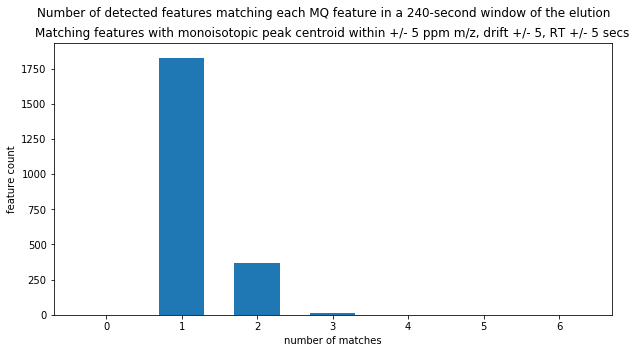

In [26]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
plt.hist(mq_feature_match_counts, bins=np.arange(start=0, stop=8)-0.5, rwidth=0.6)
plt.xlabel('number of matches')
plt.ylabel('feature count')
plt.margins(0.06)
plt.suptitle('Number of detected features matching each MQ feature in a {}-second window of the elution'.format(RT_LIMIT_UPPER-RT_LIMIT_LOWER))
plt.title('Matching features with monoisotopic peak centroid within +/- {} ppm m/z, drift +/- {}, RT +/- {} secs'.format(MZ_TOLERANCE_PPM, DRIFT_TOLERANCE, RT_TOLERANCE_SECS))
plt.show()

For each detected feature, how many matching MQ features are there?

In [27]:
feature_list_subset_df["mz_delta"] = feature_list_subset_df.mono_peak_centroid_mz * MZ_TOLERANCE_PERCENT / 100
feature_list_subset_df["mz_upper"] = feature_list_subset_df.mono_peak_centroid_mz + feature_list_subset_df.mz_delta
feature_list_subset_df["mz_lower"] = feature_list_subset_df.mono_peak_centroid_mz - feature_list_subset_df.mz_delta

feature_list_subset_df["rt_upper"] = feature_list_subset_df.mono_peak_centroid_rt + RT_TOLERANCE_SECS
feature_list_subset_df["rt_lower"] = feature_list_subset_df.mono_peak_centroid_rt - RT_TOLERANCE_SECS

feature_list_subset_df["drift_upper"] = feature_list_subset_df.mono_peak_centroid_scan + DRIFT_TOLERANCE
feature_list_subset_df["drift_lower"] = feature_list_subset_df.mono_peak_centroid_scan - DRIFT_TOLERANCE

In [28]:
match_list = []

for idx in range(len(feature_list_subset_df)):
    feature_df = feature_list_subset_df.iloc[idx]
    
    feature_id = feature_df.feature_id
    
    mz_lower = feature_df.mz_lower
    mz_upper = feature_df.mz_upper
    rt_lower = feature_df.rt_lower
    rt_upper = feature_df.rt_upper
    drift_lower = feature_df.drift_lower
    drift_upper = feature_df.drift_upper
    charge_state = feature_df.charge_state

    matches_df = allpeptides_subset_df[
                                (
                                    (allpeptides_subset_df.mz >= mz_lower) &
                                    (allpeptides_subset_df.mz <= mz_upper)
                                ) &
                                (
                                    (allpeptides_subset_df.rt >= rt_lower) &
                                    (allpeptides_subset_df.rt <= rt_upper)
                                ) &
                                (
                                    (allpeptides_subset_df.scan >= drift_lower) &
                                    (allpeptides_subset_df.scan <= drift_upper)
                                ) &
                                (
                                    charge_state == allpeptides_subset_df.charge_state
                                )
    ]
    
    for match_idx in range(len(matches_df)):
        mq_feature_id = matches_df.iloc[match_idx].mq_feature_id
        match_list.append((int(feature_id), int(mq_feature_id)))


In [29]:
mq_match_list_df = pd.DataFrame(match_list, columns=['feature_id','mq_feature_id'])

In [30]:
mq_match_list_df.head()

,feature_id,mq_feature_id
0,33,20
1,46,14
2,60,79
3,72,51
4,27,241


In [31]:
len(mq_match_list_df)

2593

In [32]:
mq_match_list_df.sort_values(by=['feature_id'], ascending=True, inplace=False).head()

,feature_id,mq_feature_id
7,2,2
99,3,3
5,7,35
16,23,52
9,26,8


In [33]:
mq_match_list_df.sort_values(by=['feature_id'], ascending=True, inplace=False).tail()

,feature_id,mq_feature_id
2334,9434,1855
2478,9436,1745
2537,9438,6974
2427,9439,7171
2484,9440,3599


In [34]:
feature_match_counts = mq_match_list_df.feature_id.value_counts()

In [35]:
feature_match_counts.tail()

2670    1
2668    1
619     1
8809    1
4096    1
Name: feature_id, dtype: int64

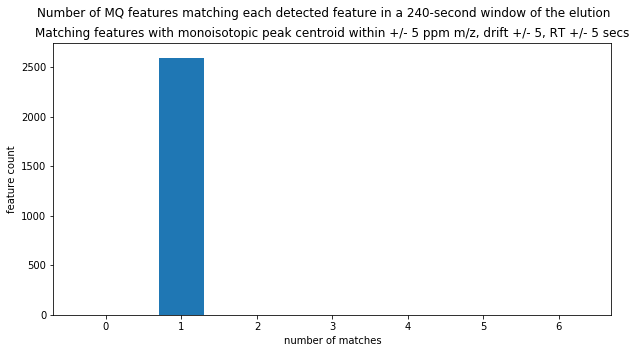

In [36]:
f, ax1 = plt.subplots()
f.set_figheight(5)
f.set_figwidth(10)
plt.hist(feature_match_counts, bins=np.arange(start=0, stop=8)-0.5, rwidth=0.6)
plt.xlabel('number of matches')
plt.ylabel('feature count')
plt.margins(0.06)
plt.suptitle('Number of MQ features matching each detected feature in a {}-second window of the elution'.format(RT_LIMIT_UPPER-RT_LIMIT_LOWER))
plt.title('Matching features with monoisotopic peak centroid within +/- {} ppm m/z, drift +/- {}, RT +/- {} secs'.format(MZ_TOLERANCE_PPM, DRIFT_TOLERANCE, RT_TOLERANCE_SECS))
plt.show()

In [37]:
# total features found by MQ
len(allpeptides_subset_df)

16610

In [38]:
# features found by MQ also found by my pipeline
len(match_list_df)

2593

In [39]:
# total features found by my pipeline
len(feature_list_subset_df)

9318

In [40]:
feature_list_subset_df.sort_values(by=['feature_summed_intensity'], ascending=False, inplace=False).head()

,feature_id,mono_peak_centroid_mz,mono_peak_centroid_rt,mono_peak_centroid_scan,monoisotopic_mass,feature_summed_intensity,charge_state,mz_delta,mz_upper,mz_lower,rt_upper,rt_lower,drift_upper,drift_lower
14,16,561.288657,4399.253358,635.482727,1120.563433,6320648,2,0.002806,561.291464,561.285851,4404.253358,4394.253358,640.482727,630.482727
4,5,713.372338,4529.118263,482.402279,1424.729543,6165001,2,0.003567,713.375905,713.368771,4534.118263,4524.118263,487.402279,477.402279
31,33,648.880952,4465.630934,547.362841,1295.747012,5424951,2,0.003244,648.884197,648.877708,4470.630934,4460.630934,552.362841,542.362841
44,46,681.025846,4423.473243,498.254684,2040.053006,5330614,3,0.003405,681.029251,681.022440,4428.473243,4418.473243,503.254684,493.254684
58,60,530.779643,4416.990095,661.146634,1059.544137,4879618,2,0.002654,530.782297,530.776989,4421.990095,4411.990095,666.146634,656.146634


In [41]:
match_list_df.sort_values(by=['mq_feature_id'], ascending=True, inplace=False)[40:70]

,mq_feature_id,feature_id
40,31,137
41,32,221
42,34,118
43,35,7
44,36,418
45,38,56
46,38,727
47,39,448
48,40,394
49,41,170


In [42]:
match_list_df.sort_values(by=['feature_id'], ascending=True, inplace=False).head()

,mq_feature_id,feature_id
1,2,2
4,3,3
43,35,7
62,52,23
12,8,26


Visualise an MQ feature that I missed

In [43]:
MQ_FEATURE_ID_NOT_MATCHED = 42

In [44]:
mq_feature_df = allpeptides_subset_df[allpeptides_subset_df.mq_feature_id == MQ_FEATURE_ID_NOT_MATCHED]
mq_feature_df

,mz,intensity,charge_state,rt,scan,mq_feature_id,mz_delta,mz_upper,mz_lower,rt_upper,rt_lower,drift_upper,drift_lower
139523,621.97655,2352200.0,3,4438.456,714,42,0.00311,621.97966,621.97344,4443.456,4433.456,719,709


In [45]:
mz_lower = mq_feature_df.mz_lower.values[0] - 4
mz_upper = mq_feature_df.mz_upper.values[0] + 4
rt_lower = mq_feature_df.rt.values[0] - 0.5
rt_upper = mq_feature_df.rt.values[0] + 0.5
drift_lower = mq_feature_df.drift_lower.values[0] - 20
drift_upper = mq_feature_df.drift_upper.values[0] + 20

In [46]:
feature_isotopes_filename = "{}/HeLa_20KInt-feature-isotopes.csv".format(BASE_NAME)
feature_isotopes_df = pd.read_csv(feature_isotopes_filename)

In [47]:
feature_isotopes_df.head()

,feature_id,feature_region_peak_id,centroid_scan,centroid_rt,centroid_mz,peak_summed_intensity
0,1,1,431.541637,4433.020714,895.958387,1828345
1,1,2,433.271139,4433.358048,896.460127,1434429
2,1,3,432.919773,4432.153007,896.964310,1023359
3,1,4,436.075284,4430.680979,897.470706,128128
4,2,2,415.517356,4459.626480,877.904042,1377563


In [48]:
# find all the feature region peaks nearby
nearby_feature_peaks_df = feature_isotopes_df[
                                (
                                    (feature_isotopes_df.centroid_mz >= mz_lower) &
                                    (feature_isotopes_df.centroid_mz <= mz_upper)
                                ) &
                                (
                                    (feature_isotopes_df.centroid_rt >= rt_lower) &
                                    (feature_isotopes_df.centroid_rt <= rt_upper)
                                ) &
                                (
                                    (feature_isotopes_df.centroid_scan >= drift_lower) &
                                    (feature_isotopes_df.centroid_scan <= drift_upper)
                                )
                            ]

In [49]:
nearby_feature_ids = nearby_feature_peaks_df.feature_id.unique().tolist()

In [50]:
nearby_feature_ids

[75, 239, 2096, 3596, 4989, 8035]

In [51]:
nearby_feature_points_df_list = []
for feature_id in nearby_feature_ids:
    SUMMED_REGIONS_DATABASE = '{}/HeLa_20KInt-features-{}-{}.sqlite'.format(BASE_NAME, feature_id, feature_id)
    db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
    nearby_feature_points_df = pd.read_sql_query("select * from summed_ms1_regions where (feature_id,peak_id) in (select feature_id,feature_region_peak_id from feature_isotopes where feature_id={})".format(feature_id), db_conn)
    nearby_feature_points_df["marker_size"] = (((np.log(nearby_feature_points_df.intensity)-5)*2)**2)*4
    nearby_feature_points_df_list.append((nearby_feature_points_df))
    db_conn.close()

In [52]:
summed_region_points_df_list = []
for feature_id in nearby_feature_ids:
    SUMMED_REGIONS_DATABASE = '{}/HeLa_20KInt-features-{}-{}.sqlite'.format(BASE_NAME, feature_id, feature_id)
    db_conn = sqlite3.connect(SUMMED_REGIONS_DATABASE)
    summed_region_points_df = pd.read_sql_query("select * from summed_ms1_regions where feature_id={}".format(feature_id), db_conn)
    summed_region_points_df["marker_size"] = (((np.log(nearby_feature_points_df.intensity)-5)*2)**2)*4
    summed_region_points_df_list.append((summed_region_points_df))
    db_conn.close()

In [53]:
# find all the other MQ features nearby
nearby_mq_features_df = allpeptides_subset_df[
                                (
                                    (allpeptides_subset_df.mz >= mz_lower) &
                                    (allpeptides_subset_df.mz <= mz_upper)
                                ) &
                                (
                                    (allpeptides_subset_df.rt >= rt_lower) &
                                    (allpeptides_subset_df.rt <= rt_upper)
                                ) &
                                (
                                    (allpeptides_subset_df.scan >= drift_lower) &
                                    (allpeptides_subset_df.scan <= drift_upper)
                                )
                            ]

In [54]:
nearby_mq_features_df

,mz,intensity,charge_state,rt,scan,mq_feature_id,mz_delta,mz_upper,mz_lower,rt_upper,rt_lower,drift_upper,drift_lower
139523,621.97655,2352200.0,3,4438.456,714,42,0.00311,621.97966,621.97344,4443.456,4433.456,719,709


In [55]:
tableau20 = [(31, 119, 180), (174, 199, 232), (255, 127, 14), (255, 187, 120),  
             (44, 160, 44), (152, 223, 138), (214, 39, 40), (255, 152, 150),  
             (148, 103, 189), (197, 176, 213), (140, 86, 75), (196, 156, 148),  
             (227, 119, 194), (247, 182, 210), (127, 127, 127), (199, 199, 199),  
             (188, 189, 34), (219, 219, 141), (23, 190, 207), (158, 218, 229)]

# Rescale to values between 0 and 1
tableau20_mpl = tableau20.copy()
for i in range(len(tableau20_mpl)):  
    r, g, b = tableau20_mpl[i]  
    tableau20_mpl[i] = (r / 255., g / 255., b / 255.)

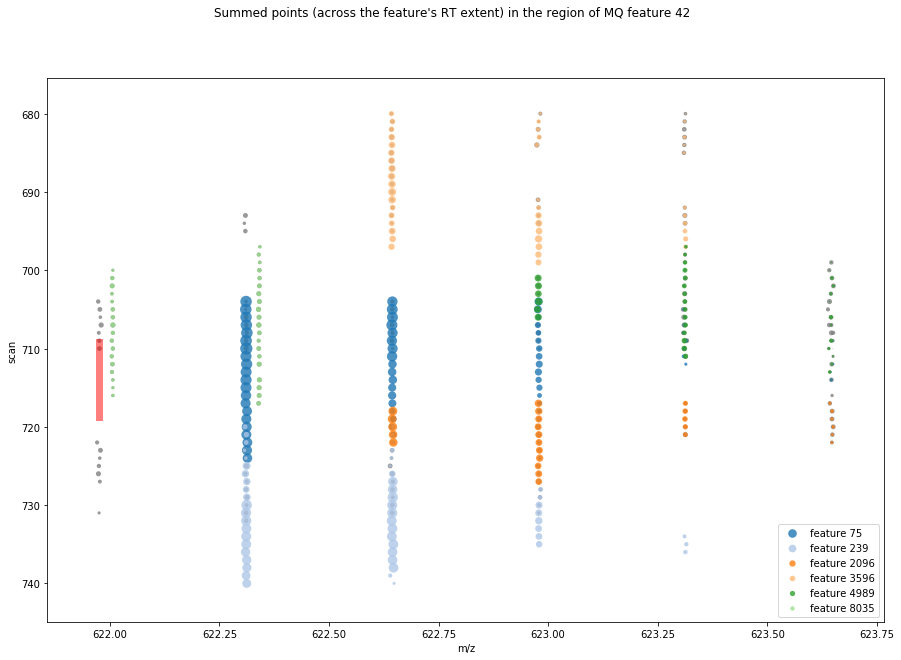

In [56]:
import matplotlib.patches as patches

f, ax = plt.subplots()
plt.xlabel('m/z')
plt.ylabel('scan')
plt.gca().invert_yaxis()

# draw the MQ feature rectangle
mz_lower = mq_feature_df.mz_lower.values[0]
drift_lower = mq_feature_df.drift_lower.values[0]
mz_range = mq_feature_df.mz_upper.values[0] - mq_feature_df.mz_lower.values[0]
drift_range = mq_feature_df.drift_upper.values[0] - mq_feature_df.drift_lower.values[0]
mq_feature_rect = patches.Rectangle((mz_lower, drift_lower), mz_range, drift_range, linewidth=4, alpha=0.5, linestyle='-', edgecolor='r', facecolor='none')
ax.add_patch(mq_feature_rect)

# show all the summed points of nearby features
for idx,feature_id in enumerate(nearby_feature_ids):
    summed_region_points_df = summed_region_points_df_list[idx]
    ax.scatter(summed_region_points_df.mz, summed_region_points_df.scan, marker='.', color='gray', lw=0, s=summed_region_points_df.marker_size, alpha=0.8)

# show only the summed points of nearby feature isotopes
scatter_groups = []
for idx,feature_id in enumerate(nearby_feature_ids):
    nearby_feature_points_df = nearby_feature_points_df_list[idx]
    scatter = ax.scatter(nearby_feature_points_df.mz, nearby_feature_points_df.scan, marker='.', color=tableau20_mpl[idx], lw=0, s=nearby_feature_points_df.marker_size, alpha=0.8, label="feature {}".format(feature_id))
    scatter_groups.append((scatter))

plt.legend(handles=scatter_groups, loc='lower right')
f.set_figheight(10)
f.set_figwidth(15)
plt.suptitle('Summed points (across the feature\'s RT extent) in the region of MQ feature {}'.format(MQ_FEATURE_ID_NOT_MATCHED))
plt.margins(0.06)
plt.show()

In [57]:
NEARBY_CANDIDATE_FEATURE_ID = 75

In [58]:
feature_df = feature_list_subset_df[feature_list_subset_df.feature_id==NEARBY_CANDIDATE_FEATURE_ID]
feature_df

,feature_id,mono_peak_centroid_mz,mono_peak_centroid_rt,mono_peak_centroid_scan,monoisotopic_mass,feature_summed_intensity,charge_state,mz_delta,mz_upper,mz_lower,rt_upper,rt_lower,drift_upper,drift_lower
73,75,622.311419,4437.885545,712.076667,1863.910963,1106797,3,0.003112,622.314531,622.308308,4442.885545,4432.885545,717.076667,707.076667


In [59]:
mq_feature = allpeptides_subset_df[allpeptides_subset_df.mq_feature_id==MQ_FEATURE_ID_NOT_MATCHED]
mq_feature

,mz,intensity,charge_state,rt,scan,mq_feature_id,mz_delta,mz_upper,mz_lower,rt_upper,rt_lower,drift_upper,drift_lower
139523,621.97655,2352200.0,3,4438.456,714,42,0.00311,621.97966,621.97344,4443.456,4433.456,719,709


In [60]:
# RT
rt_match = (feature_df.mono_peak_centroid_rt.values[0] >= mq_feature.rt_lower.values[0]) & (feature_df.mono_peak_centroid_rt.values[0] <= mq_feature.rt_upper.values[0])

In [61]:
# m/z
mz_match = (feature_df.mono_peak_centroid_mz.values[0] >= mq_feature.mz_lower.values[0]) & (feature_df.mono_peak_centroid_mz.values[0] <= mq_feature.mz_upper.values[0])

In [62]:
# drift
drift_match = (feature_df.mono_peak_centroid_scan.values[0] >= mq_feature.drift_lower.values[0]) & (feature_df.mono_peak_centroid_scan.values[0] <= mq_feature.drift_upper.values[0])

In [63]:
# charge state
charge_match = (feature_df.charge_state.values[0] >= mq_feature.charge_state.values[0])

In [64]:
print("Matches between MQ feature {} and feature {}\nm/z\t{}\nRT\t{}\ndrift\t{}\ncharge\t{}\n".format(MQ_FEATURE_ID_NOT_MATCHED,NEARBY_CANDIDATE_FEATURE_ID,mz_match,rt_match,drift_match,charge_match))

Matches between MQ feature 42 and feature 75
m/z	False
RT	True
drift	True
charge	True



In [65]:
feature_isotopes_df[feature_isotopes_df.feature_id==NEARBY_CANDIDATE_FEATURE_ID]

,feature_id,feature_region_peak_id,centroid_scan,centroid_rt,centroid_mz,peak_summed_intensity
344,75,1,712.076667,4437.885545,622.311419,738034
345,75,2,709.140973,4438.242639,622.644513,302867
346,75,4,709.420853,4437.395953,622.978513,58006
347,75,5,708.896942,4435.174604,623.310951,5657
348,75,6,711.337215,4434.867319,623.647588,2233
